<a href="https://colab.research.google.com/github/VamsiKrishna-9/Explainable-AI-for-Battery-State-of-Health-Prediction-using-SHAP-and-LIME/blob/main/MINI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.1306 - val_loss: 0.0404
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0529 - val_loss: 0.0482
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0268 - val_loss: 0.0527
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0183 - val_loss: 0.0605
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0179 - val_loss: 0.0456
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148 - val_loss: 0.0660
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0184 - val_loss: 0.0474
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - val_loss: 0.0343
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0162 - val_loss: 0.0321
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - val_loss: 0.0488
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - val_loss: 0.0339
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

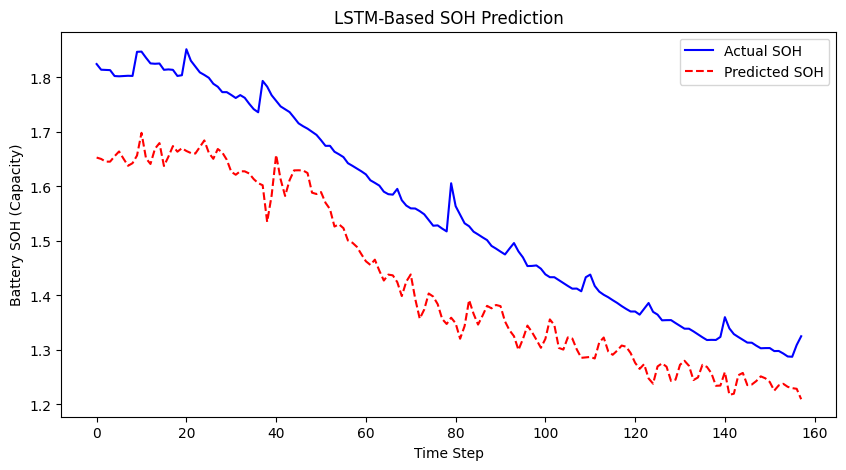

Mean Absolute Error (MAE): 0.12558312305212635
Root Mean Squared Error (RMSE): 0.13196611818274812


In [ ]:
# STEP 1: Mount Google Drive to Access Files
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

# STEP 3: Load Datasets from Google Drive
train_file = "/content/drive/My Drive/training_data.csv"  # Update the correct path if needed
test_file = "/content/drive/My Drive/testing_data.csv"     # Update the correct path if needed

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# STEP 4: Select Features and Target Variable
features = ["Voltage Measured(V)", "Current Measured", "Temperature Measured"]
target = "Capacity(Ah)"  # Battery SOH

# STEP 5: Normalize Features and Target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_x.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[[target]])

X_test = scaler_x.transform(test_df[features])
y_test = scaler_y.transform(test_df[[target]])

# STEP 6: Convert Data into Sequences for LSTM
def create_sequences(X, y, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10  # Number of time steps
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# STEP 7: Define LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)  # Predicting SOH (Capacity)
])

# STEP 8: Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# STEP 9: Train Model
history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=16, validation_data=(X_test_seq, y_test_seq), verbose=1)

# STEP 10: Predict SOH
y_pred = model.predict(X_test_seq)

# STEP 11: Convert Predictions Back to Original Scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)

# STEP 12: Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# STEP 13: Plot Results
plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual SOH", color="blue")
plt.plot(y_pred_rescaled, label="Predicted SOH", color="red", linestyle="dashed")
plt.legend()
plt.title("LSTM-Based SOH Prediction")
plt.xlabel("Time Step")
plt.ylabel("Battery SOH (Capacity)")
plt.show()
# Convert predictions back to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=766eac1d0ee743b00dcea7a6db16205cafd6d72d8f9145e5a110826453a7caae
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.2186 - val_loss: 0.0936
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0819 - val_loss: 0.0970
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0552 - val_loss: 0.1004
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0491 - val_loss: 0.0882
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0467 - val_loss: 0.0945
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0422 - val_loss: 0.0812
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0410 - val_loss: 0.0973
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0392 - val_loss: 0.0819
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0333 - val_loss: 0.0781
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0313 - val_loss: 0.0813
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0298 - val_loss: 0.0763
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(158, 10, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 10, 3))']
  warnings.warn(msg)


SHAP values original shape: (158, 10, 3, 1)
SHAP values new shape (after squeezing): (158, 10, 3)
SHAP values reshaped shape: (158, 30)
X_test_seq reshaped shape: (158, 30)


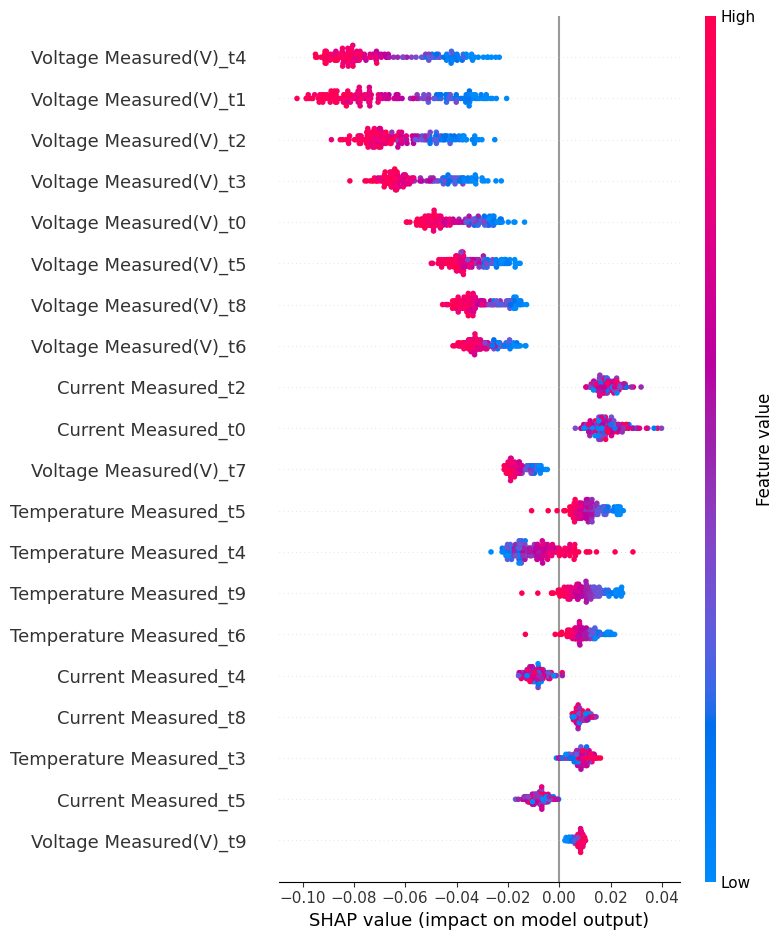


🔍 LIME Explanation for a Random Sample
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


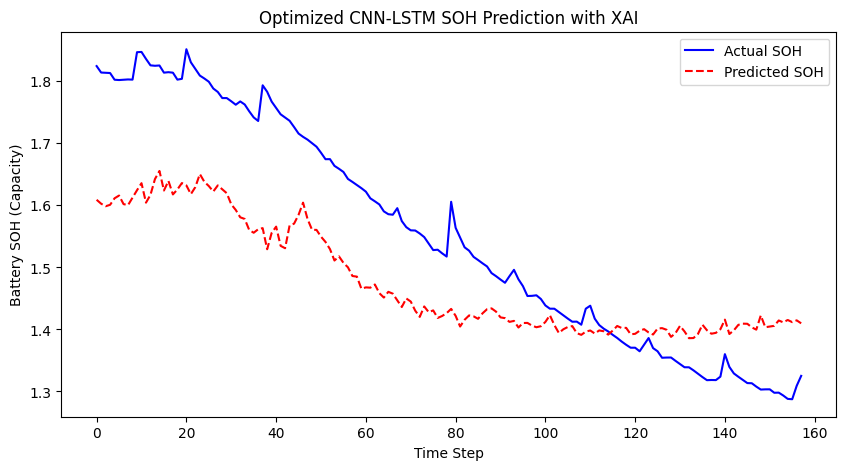

In [ ]:
# STEP 1: Mount Google Drive (if running in Colab)
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install Required Packages
!pip install shap lime

# STEP 3: Import Required Libraries
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_error, mean_squared_error

# STEP 4: Load Datasets from Google Drive
train_file = "/content/drive/My Drive/training_data.csv"
test_file = "/content/drive/My Drive/testing_data.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# STEP 5: Select Features and Target Variable
features = ["Voltage Measured(V)", "Current Measured", "Temperature Measured"]
target = "Capacity(Ah)"  # Battery SOH

# STEP 6: Normalize Features and Target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_x.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[[target]])

X_test = scaler_x.transform(test_df[features])
y_test = scaler_y.transform(test_df[[target]])

# STEP 7: Convert Data into Sequences for CNN-LSTM
def create_sequences(X, y, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10  # Number of time steps
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape input for CNN (Conv1D needs 3D shape: [samples, timesteps, features])
X_train_seq = np.reshape(X_train_seq, (X_train_seq.shape[0], seq_length, len(features)))
X_test_seq = np.reshape(X_test_seq, (X_test_seq.shape[0], seq_length, len(features)))

# STEP 8: Define Optimized CNN-LSTM Model
model = Sequential([
    # CNN Feature Extraction
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, len(features))),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),

    # LSTM Layers
    LSTM(128, return_sequences=True),
    Dropout(0.3),  # Increased Dropout
    LSTM(64, return_sequences=False),
    Dropout(0.3),

    # Fully Connected Layers with Regularization
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    Dense(1)  # Predicting SOH (Capacity)
])

# STEP 9: Compile Model with Optimized Learning Rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse")

# STEP 10: Train Model with Tuned Batch Size
history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=16, validation_data=(X_test_seq, y_test_seq), verbose=1)

# STEP 11: Predict SOH
y_pred = model.predict(X_test_seq)

# STEP 12: Convert Predictions Back to Original Scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)

# STEP 13: Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# STEP 14: SHAP Explanation (Fixed)
print("\n🔍 SHAP Analysis: Feature Importance for Predictions")

# Ensure SHAP is computed for all test samples
num_test_samples = X_test_seq.shape[0]

# Convert the CNN-LSTM model to a SHAP-compatible explainer
explainer = shap.GradientExplainer(model, X_train_seq[:num_test_samples])  # Match test sample count
shap_values = explainer.shap_values(X_test_seq[:num_test_samples])  # Compute SHAP for all test samples

# Convert SHAP values to NumPy array
shap_values = np.array(shap_values)
print("SHAP values original shape:", shap_values.shape)

# Remove last dimension if it's singleton (e.g., (50,10,3,1) → (50,10,3))
if shap_values.shape[-1] == 1:
    shap_values = np.squeeze(shap_values, axis=-1)

# Debugging: Check new shape
print("SHAP values new shape (after squeezing):", shap_values.shape)

# Flatten the time-series feature names for SHAP visualization
flattened_feature_names = [f"{feature}_t{t}" for t in range(seq_length) for feature in features]

# Reshape SHAP values to match input feature matrix
shap_values_reshaped = shap_values.reshape((num_test_samples, -1))

# Debugging: Check reshaped shape
print("SHAP values reshaped shape:", shap_values_reshaped.shape)
print("X_test_seq reshaped shape:", X_test_seq.reshape(num_test_samples, -1).shape)

# Ensure feature names match reshaped data
assert shap_values_reshaped.shape == X_test_seq.reshape(num_test_samples, -1).shape, "Shape mismatch detected!"

# Plot SHAP summary
shap.summary_plot(shap_values_reshaped, features=X_test_seq.reshape(num_test_samples, -1), feature_names=flattened_feature_names)

# STEP 15: LIME Explanation for a Single Prediction (Fixed)
print("\n🔍 LIME Explanation for a Random Sample")

# LIME expects 2D input, so we reshape the training set to flatten it
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_seq.reshape(X_train_seq.shape[0], -1),
    feature_names=flattened_feature_names,
    class_names=['SOH'], mode='regression'
)

# Select a random test sample
sample_idx = np.random.randint(0, len(X_test_seq))
sample = X_test_seq[sample_idx].reshape(1, seq_length, len(features))  # Reshape to match LSTM input

# Define a function to reshape LIME’s 2D input back to 3D for the LSTM model
def lime_predict_fn(flattened_input):
    reshaped_input = flattened_input.reshape(flattened_input.shape[0], seq_length, len(features))
    return model.predict(reshaped_input)

# Get LIME explanation
lime_exp = lime_explainer.explain_instance(
    X_test_seq[sample_idx].reshape(-1),  # Flattened input for LIME
    lime_predict_fn,  # Function that reshapes and predicts
    num_features=10
)

# Display LIME Explanation
lime_exp.show_in_notebook()

# STEP 16: Plot Results
plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual SOH", color="blue")
plt.plot(y_pred_rescaled, label="Predicted SOH", color="red", linestyle="dashed")
plt.legend()
plt.title("Optimized CNN-LSTM SOH Prediction with XAI")
plt.xlabel("Time Step")
plt.ylabel("Battery SOH (Capacity)")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Attention, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load datasets from Google Drive
train_file = "/content/drive/My Drive/training_data.csv"
test_file = "/content/drive/My Drive/testing_data.csv"
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Select features & target
features = ["Voltage Measured(V)", "Current Measured", "Temperature Measured"]
target = "Capacity(Ah)"

# Normalize data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_x.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[[target]])
X_test = scaler_x.transform(test_df[features])
y_test = scaler_y.transform(test_df[[target]])

# Create sequences
def create_sequences(X, y, seq_length=20):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 20
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Define model
inputs = Input(shape=(seq_length, len(features)))
x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2))(x)
attention = Attention()([x, x])
x = LSTM(128, return_sequences=False)(attention)
x = Dense(64, activation="relu", kernel_regularizer=l2(0.0001))(x)
x = Dense(32, activation="relu")(x)
output = Dense(1)(x)
model = Model(inputs, output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0003), loss="mse", metrics=["mae"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train model
history = model.fit(X_train_seq, y_train_seq, epochs=150, batch_size=32,
                    validation_data=(X_test_seq, y_test_seq), verbose=1,
                    callbacks=[reduce_lr, early_stop])

# Predictions
y_pred = model.predict(X_test_seq)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)

# Evaluate Model
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"MAE: {mae}, RMSE: {rmse}")

# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual SOH", color="blue")
plt.plot(y_pred_rescaled, label="Predicted SOH", color="red", linestyle="dashed")
plt.legend()
plt.title("Optimized CNN-BiLSTM SOH Prediction with Attention")
plt.xlabel("Time Step")
plt.ylabel("Battery SOH (Capacity)")
plt.show()
# SHAP Analysis
print("\n🔍 SHAP Analysis: Feature Importance")
explainer = shap.Explainer(model, X_train_seq)
shap_values = explainer(X_test_seq[:50])
shap.summary_plot(shap_values, features=X_test_seq[:50], feature_names=features)

# LIME Explanation
print("\n🔍 LIME Explanation for a Random Sample")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train_seq.reshape(X_train_seq.shape[0], -1),
                                                         feature_names=features, class_names=['SOH'], mode='regression')

def lime_predict_fn(flattened_input):
    reshaped_input = flattened_input.reshape(flattened_input.shape[0], seq_length, len(features))
    return model.predict(reshaped_input)

sample_idx = np.random.randint(0, len(X_test_seq))
sample = X_test_seq[sample_idx].reshape(1, seq_length, len(features))
lime_exp = lime_explainer.explain_instance(X_test_seq[sample_idx].reshape(-1), lime_predict_fn, num_features=10)
lime_exp.show_in_notebook()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/150
